# Analysis Part 2: Confidence Interval

## Part 1:

Calculate the 90%, 95%, and 99% confidence intervals for the mean with $\sigma$ know.

$$
\bar{X} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

We will load the data from `"data/wine_dataset_assignment.csv"` and use the `alcohol` column for our analysis.

We will first get the $\bar{X}$, $\sigma$, and $n$ values.

Then we will get 32 random sample from the data and calculate the confidence intervals for each of the confidence levels mentioned above.

Finally, we will plot the confidence intervals along with the sample means.

In [1]:
DATA_DIR_PATH = "../data"
DATA_FILE_NAME = "wine_dataset_assignment.csv"

In [2]:
import pandas as pd

data = pd.read_csv(f"{DATA_DIR_PATH}/{DATA_FILE_NAME}")

In [3]:
# mean of the alcohol column
mean_alcohol = data["alcohol"].mean()
# standard deviation of the alcohol column
std_alcohol = data["alcohol"].std()
# number of samples in the alcohol column
n_alcohol = data["alcohol"].shape[0]
mean_alcohol, std_alcohol, n_alcohol

(np.float64(13.00061797752809), np.float64(0.8118265380058575), 178)

We will calculate the $Z_{\alpha/2}$ values for the confidence levels 90%, 95%, and 99%.

In [4]:
import scipy.stats as stats

confidence_levels = [0.90, 0.95, 0.99]
z_values = [stats.norm.ppf(1 - (1 - cl) / 2) for cl in confidence_levels]
z_values

[np.float64(1.644853626951472),
 np.float64(1.959963984540054),
 np.float64(2.5758293035489004)]

In [8]:
# calculate the confidence intervals for 32 random samples
import numpy as np

sample_size = 32

confidence_intervals = {cl: [] for cl in confidence_levels}
sample_means = []

sample = data["alcohol"].sample(n=sample_size, replace=True)
sample_mean = sample.mean()
sample_means.append(sample_mean)

for cl, z in zip(confidence_levels, z_values):
    margin_of_error = z * (std_alcohol / np.sqrt(sample_size))
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error
    confidence_intervals[cl].append((ci_lower, ci_upper))

In [9]:
# output the confidence intervals
confidence_intervals

{0.9: [(np.float64(12.909881245657896), np.float64(13.381993754342105))],
 0.95: [(np.float64(12.86465912406728), np.float64(13.42721587593272))],
 0.99: [(np.float64(12.776275052681017), np.float64(13.515599947318984))]}

In [10]:
# print them in the format: Confidence Level: (Lower Bound, Upper Bound)
for cl in confidence_levels:
    ci = confidence_intervals[cl][0]
    print(f"Confidence Level {cl*100}%: ({ci[0]}, {ci[1]})")

Confidence Level 90.0%: (12.909881245657896, 13.381993754342105)
Confidence Level 95.0%: (12.86465912406728, 13.42721587593272)
Confidence Level 99.0%: (12.776275052681017, 13.515599947318984)


In [11]:
import matplotlib.pyplot as plt

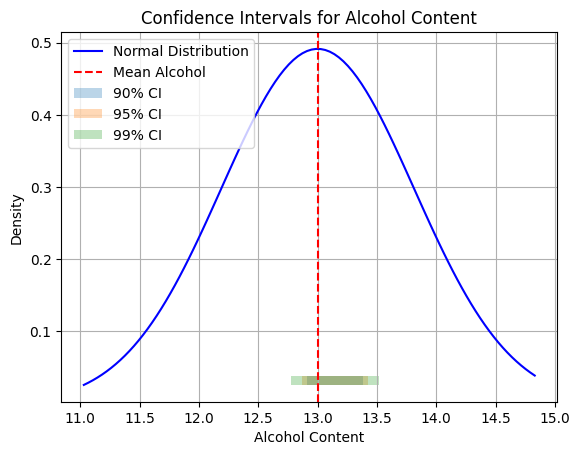

In [13]:
# plot the confidence intervals on a graph with a normal distribution of the alcohol data
x = np.linspace(data["alcohol"].min(), data["alcohol"].max(), 100)
y = stats.norm.pdf(x, mean_alcohol, std_alcohol)
plt.plot(x, y, label="Normal Distribution", color="blue")
plt.axvline(mean_alcohol, color="red", linestyle="--", label="Mean Alcohol")
for cl in confidence_levels:
    ci = confidence_intervals[cl][0]
    plt.fill_betweenx(y, ci[0], ci[1], alpha=0.3, label=f"{int(cl*100)}% CI")
plt.title("Confidence Intervals for Alcohol Content")
plt.grid(True)
plt.xlabel("Alcohol Content")
plt.ylabel("Density")
plt.legend()
plt.show()

## Part 2:

Now we will do the same as above but with $\sigma$ unknown.

$$
\bar{X} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}
$$

In [14]:
# take a sample size of 16 (assume normal distribution)
sample_size_unknown = 16

confidence_intervals_unknown = {cl: [] for cl in confidence_levels}
sample_means_unknown = []

sample_unknown = data["alcohol"].sample(n=sample_size_unknown, replace=True)
sample_mean_unknown = sample_unknown.mean()
sample_means_unknown.append(sample_mean_unknown)
sample_std_unknown = sample_unknown.std()

for cl in confidence_levels:
    t_value = stats.t.ppf(1 - (1 - cl) / 2, df=sample_size_unknown - 1)
    margin_of_error_unknown = t_value * (sample_std_unknown / np.sqrt(sample_size_unknown))
    ci_lower_unknown = sample_mean_unknown - margin_of_error_unknown
    ci_upper_unknown = sample_mean_unknown + margin_of_error_unknown
    confidence_intervals_unknown[cl].append((ci_lower_unknown, ci_upper_unknown))

In [15]:
# print the confidence intervals for unknown sigma (min, max)
for cl in confidence_levels:
    ci = confidence_intervals_unknown[cl][0]
    print(f"Confidence Level {cl*100}% (Unknown σ): ({ci[0]}, {ci[1]})")

Confidence Level 90.0% (Unknown σ): (12.623175941108729, 13.369324058891271)
Confidence Level 95.0% (Unknown σ): (12.542647209468846, 13.449852790531153)
Confidence Level 99.0% (Unknown σ): (12.369147571219507, 13.623352428780493)


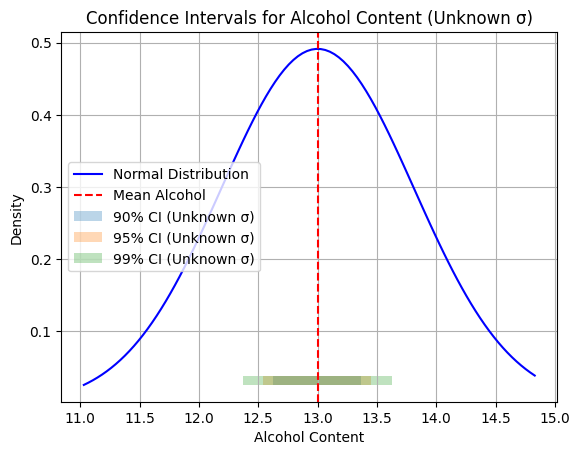

In [16]:
# plot the confidence intervals for unknown sigma on a graph with a normal distribution of the alcohol data
plt.plot(x, y, label="Normal Distribution", color="blue")
plt.axvline(mean_alcohol, color="red", linestyle="--", label="Mean Alcohol")
for cl in confidence_levels:
    ci = confidence_intervals_unknown[cl][0]
    plt.fill_betweenx(y, ci[0], ci[1], alpha=0.3, label=f"{int(cl*100)}% CI (Unknown σ)")
plt.title("Confidence Intervals for Alcohol Content (Unknown σ)")
plt.grid(True)
plt.xlabel("Alcohol Content")
plt.ylabel("Density")
plt.legend()
plt.show()